In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('daily-min-temperatures.xls', parse_dates = ['Date'], index_col = 'Date')

In [3]:
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [4]:
data = df['Temp'].values

In [6]:
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

In [10]:
history = train.tolist()
predictions = []

for t in test:
    model = AutoReg(history, lags = 7)
    model_fit = model.fit()

    y_pred = model_fit.predict(start = len(history), end = len(history))[0]
    predictions.append(y_pred)

    history.append(t)

In [11]:
rmse = np.sqrt(mean_squared_error(test, predictions))
print(f'Walk-Forward Validation RMSE: {rmse:.4f}')

Walk-Forward Validation RMSE: 2.2411


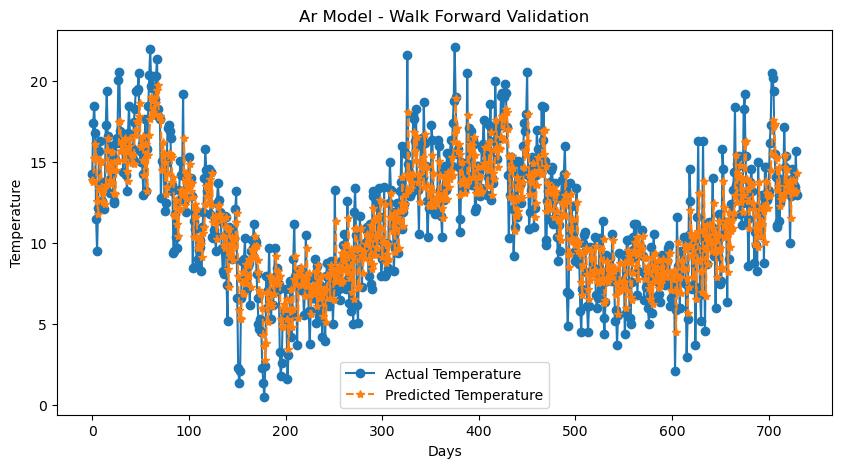

In [16]:
plt.figure(figsize = (10,5))
plt.plot(test, label = 'Actual Temperature', marker='o')
plt.plot(predictions, label = 'Predicted Temperature', marker = '*', linestyle = 'dashed')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Ar Model - Walk Forward Validation')
plt.legend()
plt.show()